# Market Segmentation of Indian EV Market

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

### Analysing the IEA Global EV Data

In [158]:
# importing the dataset
df1 = pd.read_csv(r'IEA Global EV Data 2024.csv')

In [58]:
df1.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [68]:
vehiclesdf =df1.loc[df1['unit']=='Vehicles']
vehiclesdf.describe()

,year,value
count,6842.000000,6.842000e+03
mean,2019.883221,7.503803e+05
std,5.352174,9.307153e+06
min,2010.000000,1.000000e-03
25%,2016.000000,6.725000e+01
50%,2020.000000,1.200000e+03
75%,2022.000000,2.200000e+04
max,2035.000000,4.400000e+08


### World Cloud of Total EVs

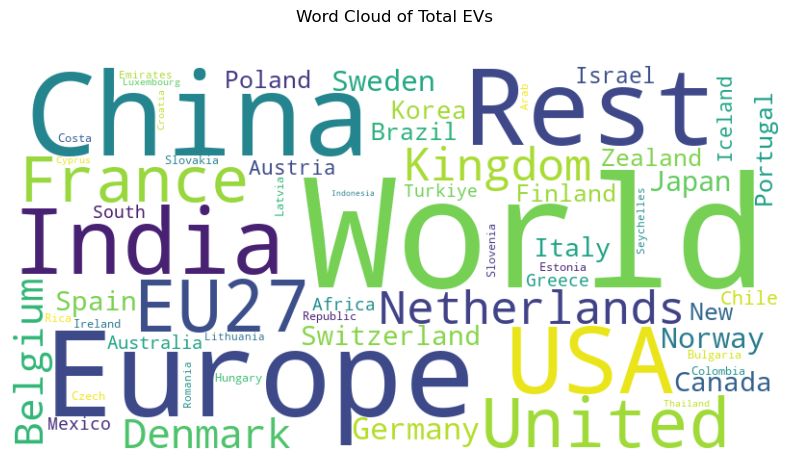

In [118]:
# Combine all text in the 'region' column into a single string
text = ' '.join(df1['region'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='viridis', collocations=False).generate(text)

# Display the word cloud
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off") 
plt.title('Word Cloud of Total EVs\n\n')
plt.show()

### Top and Bottom 5 EV Selling Countries

In [125]:
# Group the data by region and calculate the sum of the 'value' column
vehicles_countries_grouped = vehiclesdf.groupby('region')['value'].sum()

#Convert the Series to a DataFrame
vehicles_countries_df = pd.DataFrame(vehicles_countries_grouped).reset_index()

#Rename the columns for clarity
vehicles_countries_df.columns = ['region', 'total_value']

# Drop the row where the region is 'World'
vehicles_countries_df = vehicles_countries_df[vehicles_countries_df['region'] != 'World']

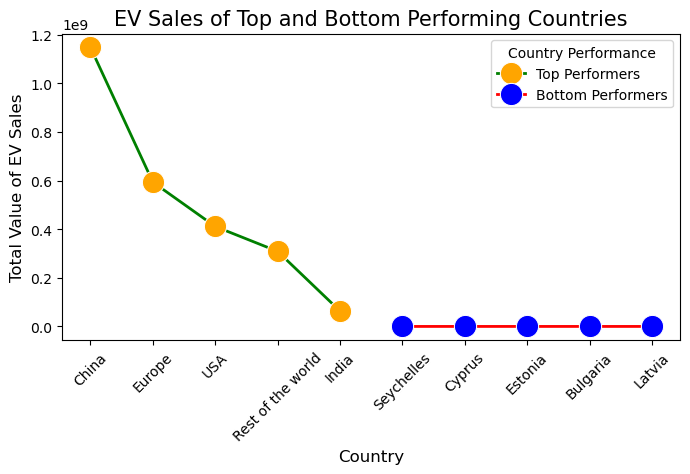

In [385]:
# Separate top and bottom countries
top_countries = vehicles_countries_df.nlargest(5, 'total_value')
bottom_countries = vehicles_countries_df.nsmallest(5, 'total_value')

plt.figure(figsize=(7, 5))

# Plot top countries in one color (e.g., blue)
sns.lineplot(data=top_countries, x='region', y='total_value', marker='o', color='green', markerfacecolor='orange', markersize=16, label='Top Performers', linewidth=2)

# Plot bottom countries in another color (e.g., red)
sns.lineplot(data=bottom_countries, x='region', y='total_value', marker='o', color='red', markerfacecolor='blue', markersize=16, label='Bottom Performers', linewidth=2)


plt.title('EV Sales of Top and Bottom Performing Countries', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Value of EV Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country Performance')
plt.tight_layout()
plt.show()

## Analysing Indian Data

Vahan Dashboard: State Wise Vehicle Category Data For All State ( Till Today )

In [19]:
df2 = pd.read_csv(r'VahanreportTable - reportTable.csv')
df2.head()

,S No,State,2WIC,2WN,2WT,3WIC,3WN,3WT,4WIC,HGV,HMV,HPV,LGV,LMV,LPV,MGV,MMV,MPV,OTH,Total
0,1,ANDAMAN & NICOBAR ISLAND,0,29,40,0,0,30,0,0,0,40,2,101,17,0,0,0,0,259
1,2,ANDHRA PRADESH,2,109754,602,0,743,6213,3,23,8,128,85,6302,58,0,5,1,1870,125797
2,3,ARUNACHAL PRADESH,0,29,0,0,0,3,0,0,0,0,0,52,1,0,0,0,0,85
3,4,ASSAM,0,8803,0,0,1,194541,0,4,0,115,526,747,72,0,0,118,1,204928
4,5,BIHAR,0,44792,0,0,2,252637,2,7,0,27,237,1614,21,1,0,0,0,299340


<Figure size 1400x800 with 0 Axes>

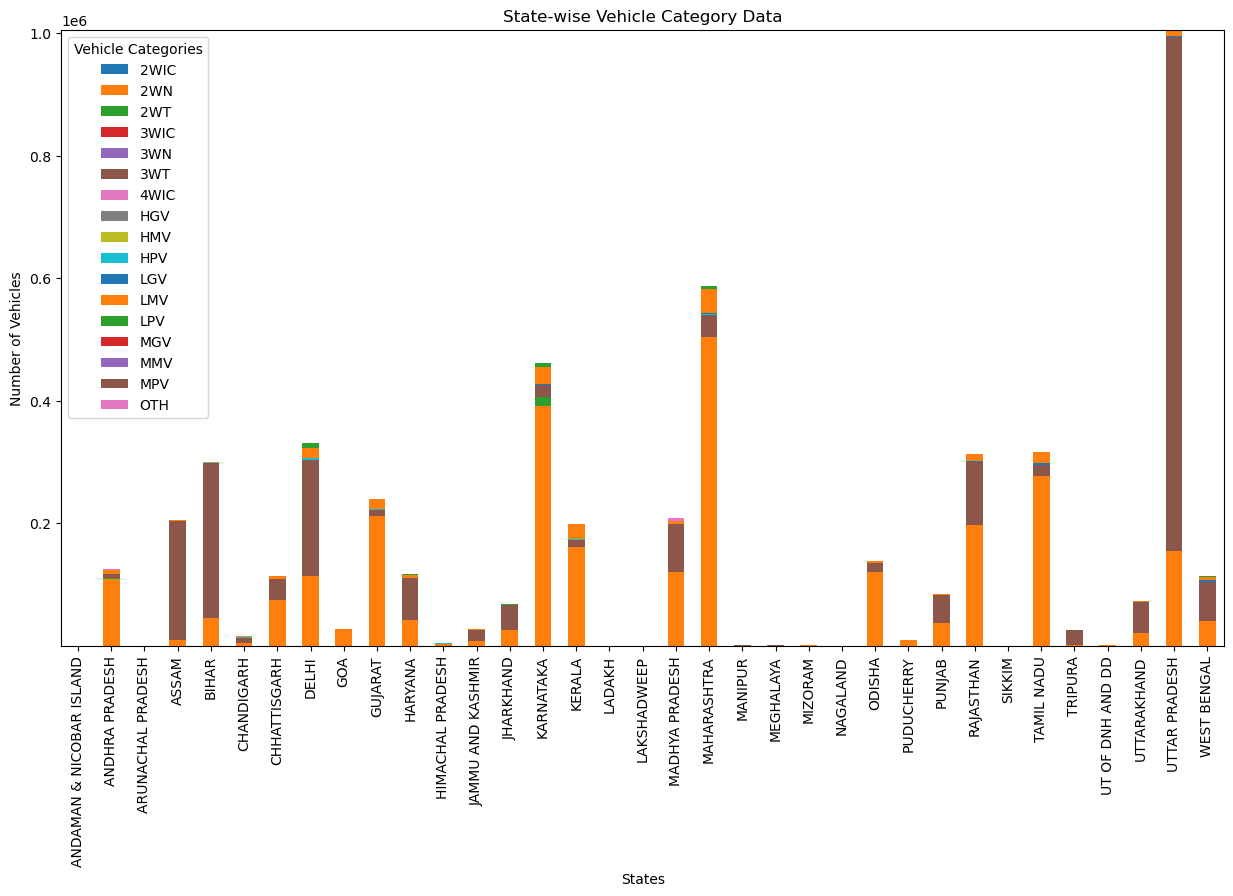

In [360]:
# Step 1: Convert all columns to int except the 'State' column
for col in df2.columns[2:]:  # Skip the first two columns: 'S No' and 'State'
    df2[col] = df2[col].astype(int)

# Step 2: Visualize the Data
# Setting the index to the State column for better visualization
df2.set_index('State', inplace=True)

# Create a bar plot for each vehicle category
plt.figure(figsize=(14, 8))
df2.drop(columns=['S No', 'Total']).plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('State-wise Vehicle Category Data')
plt.xlabel('States')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.legend(title='Vehicle Categories')
plt.show()

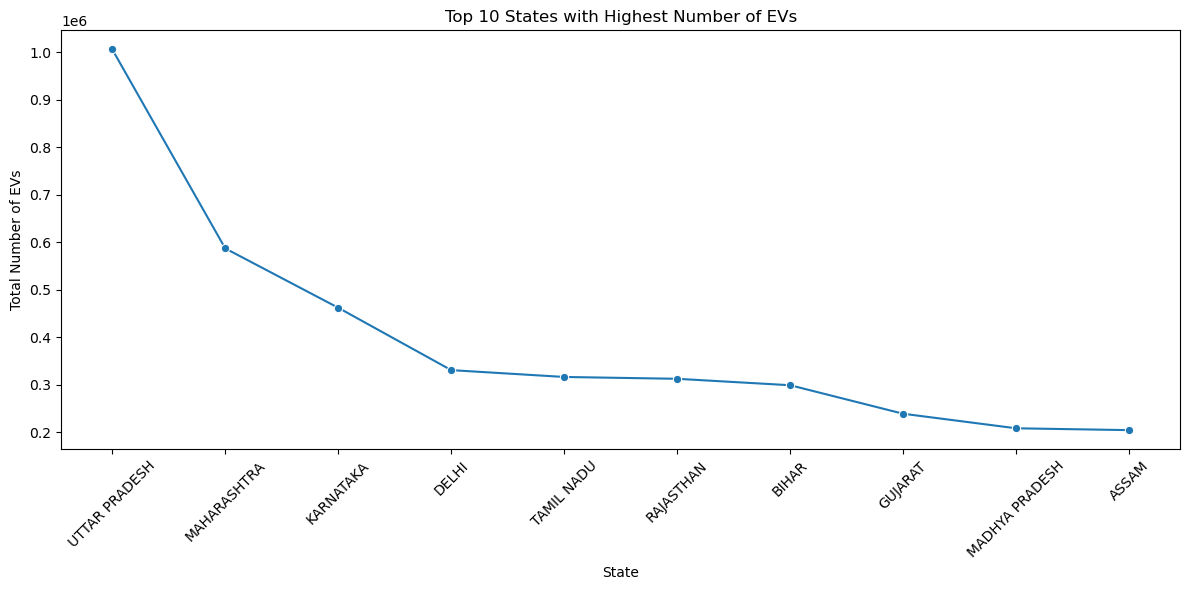

In [387]:
# Sort data by 'Total' in descending order and select the top 10 states
top_10_states = df2.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_states, x='State', y='Total', marker='o')
plt.title('Top 10 States with Highest Number of EVs')
plt.xlabel('State')
plt.ylabel('Total Number of EVs')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [526]:
top_10_states.index

Index(['UTTAR PRADESH', 'MAHARASHTRA', 'KARNATAKA', 'DELHI', 'TAMIL NADU',
       'RAJASTHAN', 'BIHAR', 'GUJARAT', 'MADHYA PRADESH', 'ASSAM'],
      dtype='object', name='State')

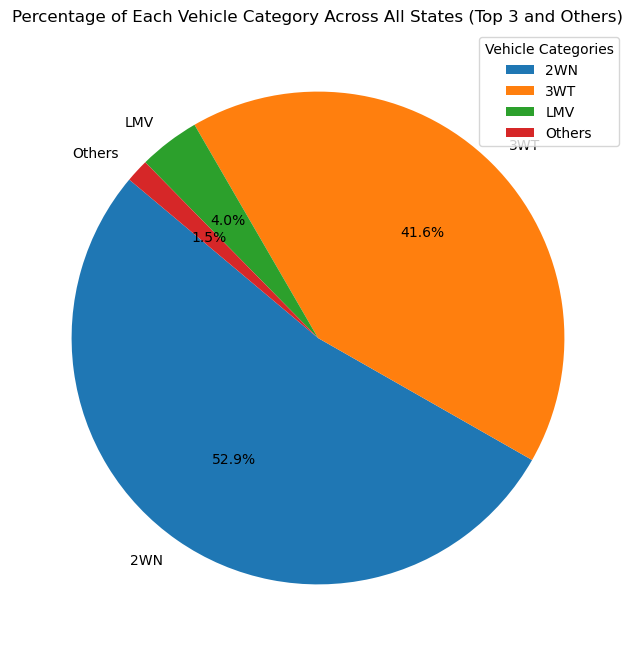

In [381]:
# Step 1: Summing each vehicle category across all states
vehicle_categories = ['2WIC', '2WN', '2WT', '3WIC', '3WN', '3WT', 
                      '4WIC', 'HGV', 'HMV', 'HPV', 'LGV', 'LMV', 
                      'LPV', 'MGV', 'MMV', 'MPV', 'OTH']

total_counts = df2[vehicle_categories].sum()

# Step 2: Identify top 3 categories
top_categories = total_counts.nlargest(3)
other_count = total_counts.sum() - top_categories.sum()

final_counts = pd.concat([top_categories, pd.Series({'Others': other_count})])

plt.figure(figsize=(12, 8))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Vehicle Category Across All States (Top 3 and Others)')
plt.legend(title="Vehicle Categories")
plt.show()

StateUT-wise Details of Electric and Non-Electric Vehicles in the Country as on 03-08-2023

In [404]:
df4 = pd.read_csv(r'StateUT-wise Details of Electric and Non-Electric Vehicles in the Country as on 03-08-2023 RS_Session_260_AU_2349_A_to_B.csv')
df4.head()

,Sl.No.,State/UT,Electric,Non-electric
0,1,Andaman and Nicobar Islands,190,161258
1,2,Andhra Pradesh,67905,16553509
2,3,Arunachal Pradesh,28,303673
3,4,Assam,120423,5312457
4,5,Bihar,161060,11631081


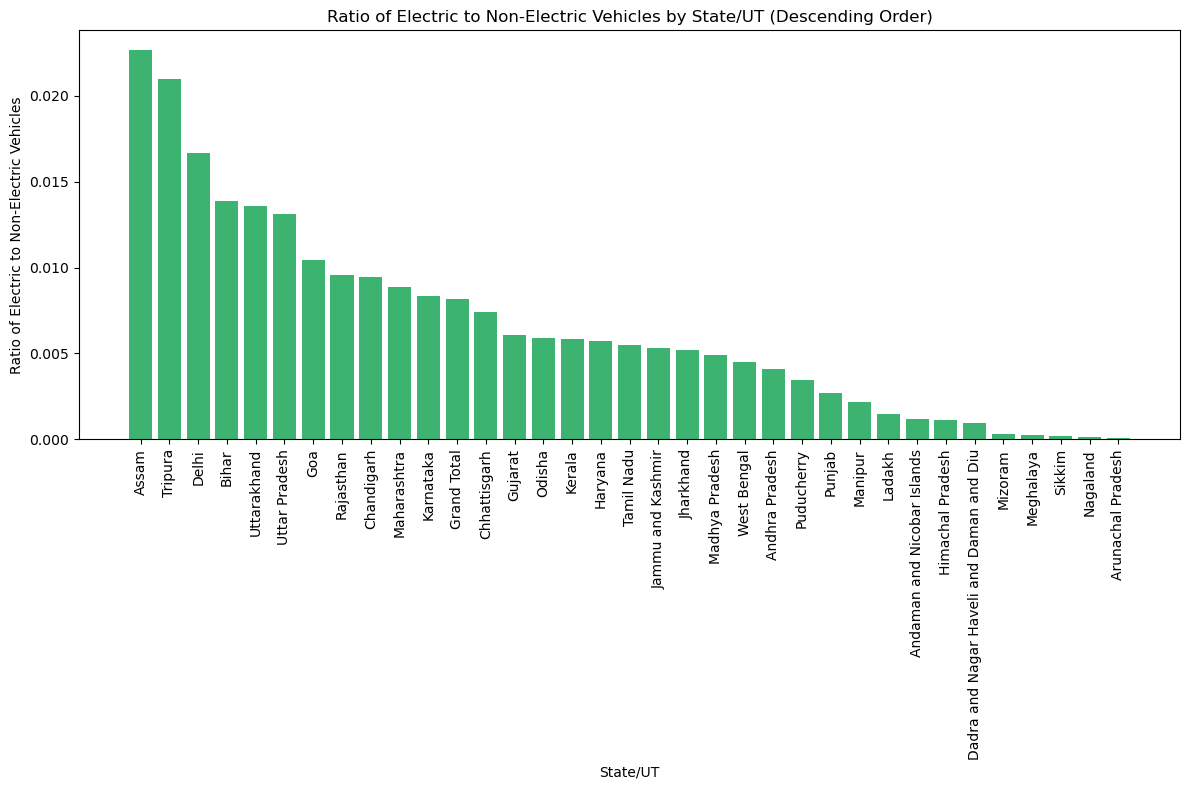

In [379]:
df4['Electric_to_NonElectric_Ratio'] = df4['Electric'] / df4['Non-electric']

# Sort the dataframe by the ratio in descending order
df4_sorted = df4.sort_values(by='Electric_to_NonElectric_Ratio', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(df4_sorted['State/UT'], df4_sorted['Electric_to_NonElectric_Ratio'], color='mediumseagreen')
plt.xlabel('State/UT')
plt.ylabel('Ratio of Electric to Non-Electric Vehicles')
plt.title('Ratio of Electric to Non-Electric Vehicles by State/UT (Descending Order)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [532]:
df4_sorted['State/UT'].values

array(['Assam', 'Tripura', 'Delhi', 'Bihar', 'Uttarakhand',
       'Uttar Pradesh', 'Goa', 'Rajasthan', 'Chandigarh', 'Maharashtra',
       'Karnataka', 'Grand Total', 'Chhattisgarh', 'Gujarat', 'Odisha',
       'Kerala', 'Haryana', 'Tamil Nadu', 'Jammu and Kashmir',
       'Jharkhand', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Puducherry', 'Punjab', 'Manipur', 'Ladakh',
       'Andaman and Nicobar Islands', 'Himachal Pradesh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Mizoram', 'Meghalaya',
       'Sikkim', 'Nagaland', 'Arunachal Pradesh'], dtype=object)

StateUT-wise Number of Electric Vehicles (Evs) Registered in Vahan4 from 2020 to 2023

In [440]:
df5 = pd.read_csv(r'StateUT-wise Number of Electric Vehicles (Evs) Registered in Vahan4 from 2020 to 2023RS_Session_262_AU_757_E_ii.csv')
df5.head()

,Sl. No.,State/UT,2020,2021,2022,2023,Grand Total
0,1,Andaman and Nicobar Islands,36.0,92,23,18,169
1,2,Andhra Pradesh,1654.0,9738,29450,29546,70388
2,3,Arunachal Pradesh,5.0,2,2,17,26
3,4,Assam,8357.0,15634,40719,56448,121158
4,5,Bihar,12447.0,23082,55751,79469,170749


In [442]:
# Replace NaN values with 0
df5.fillna(0, inplace=True)

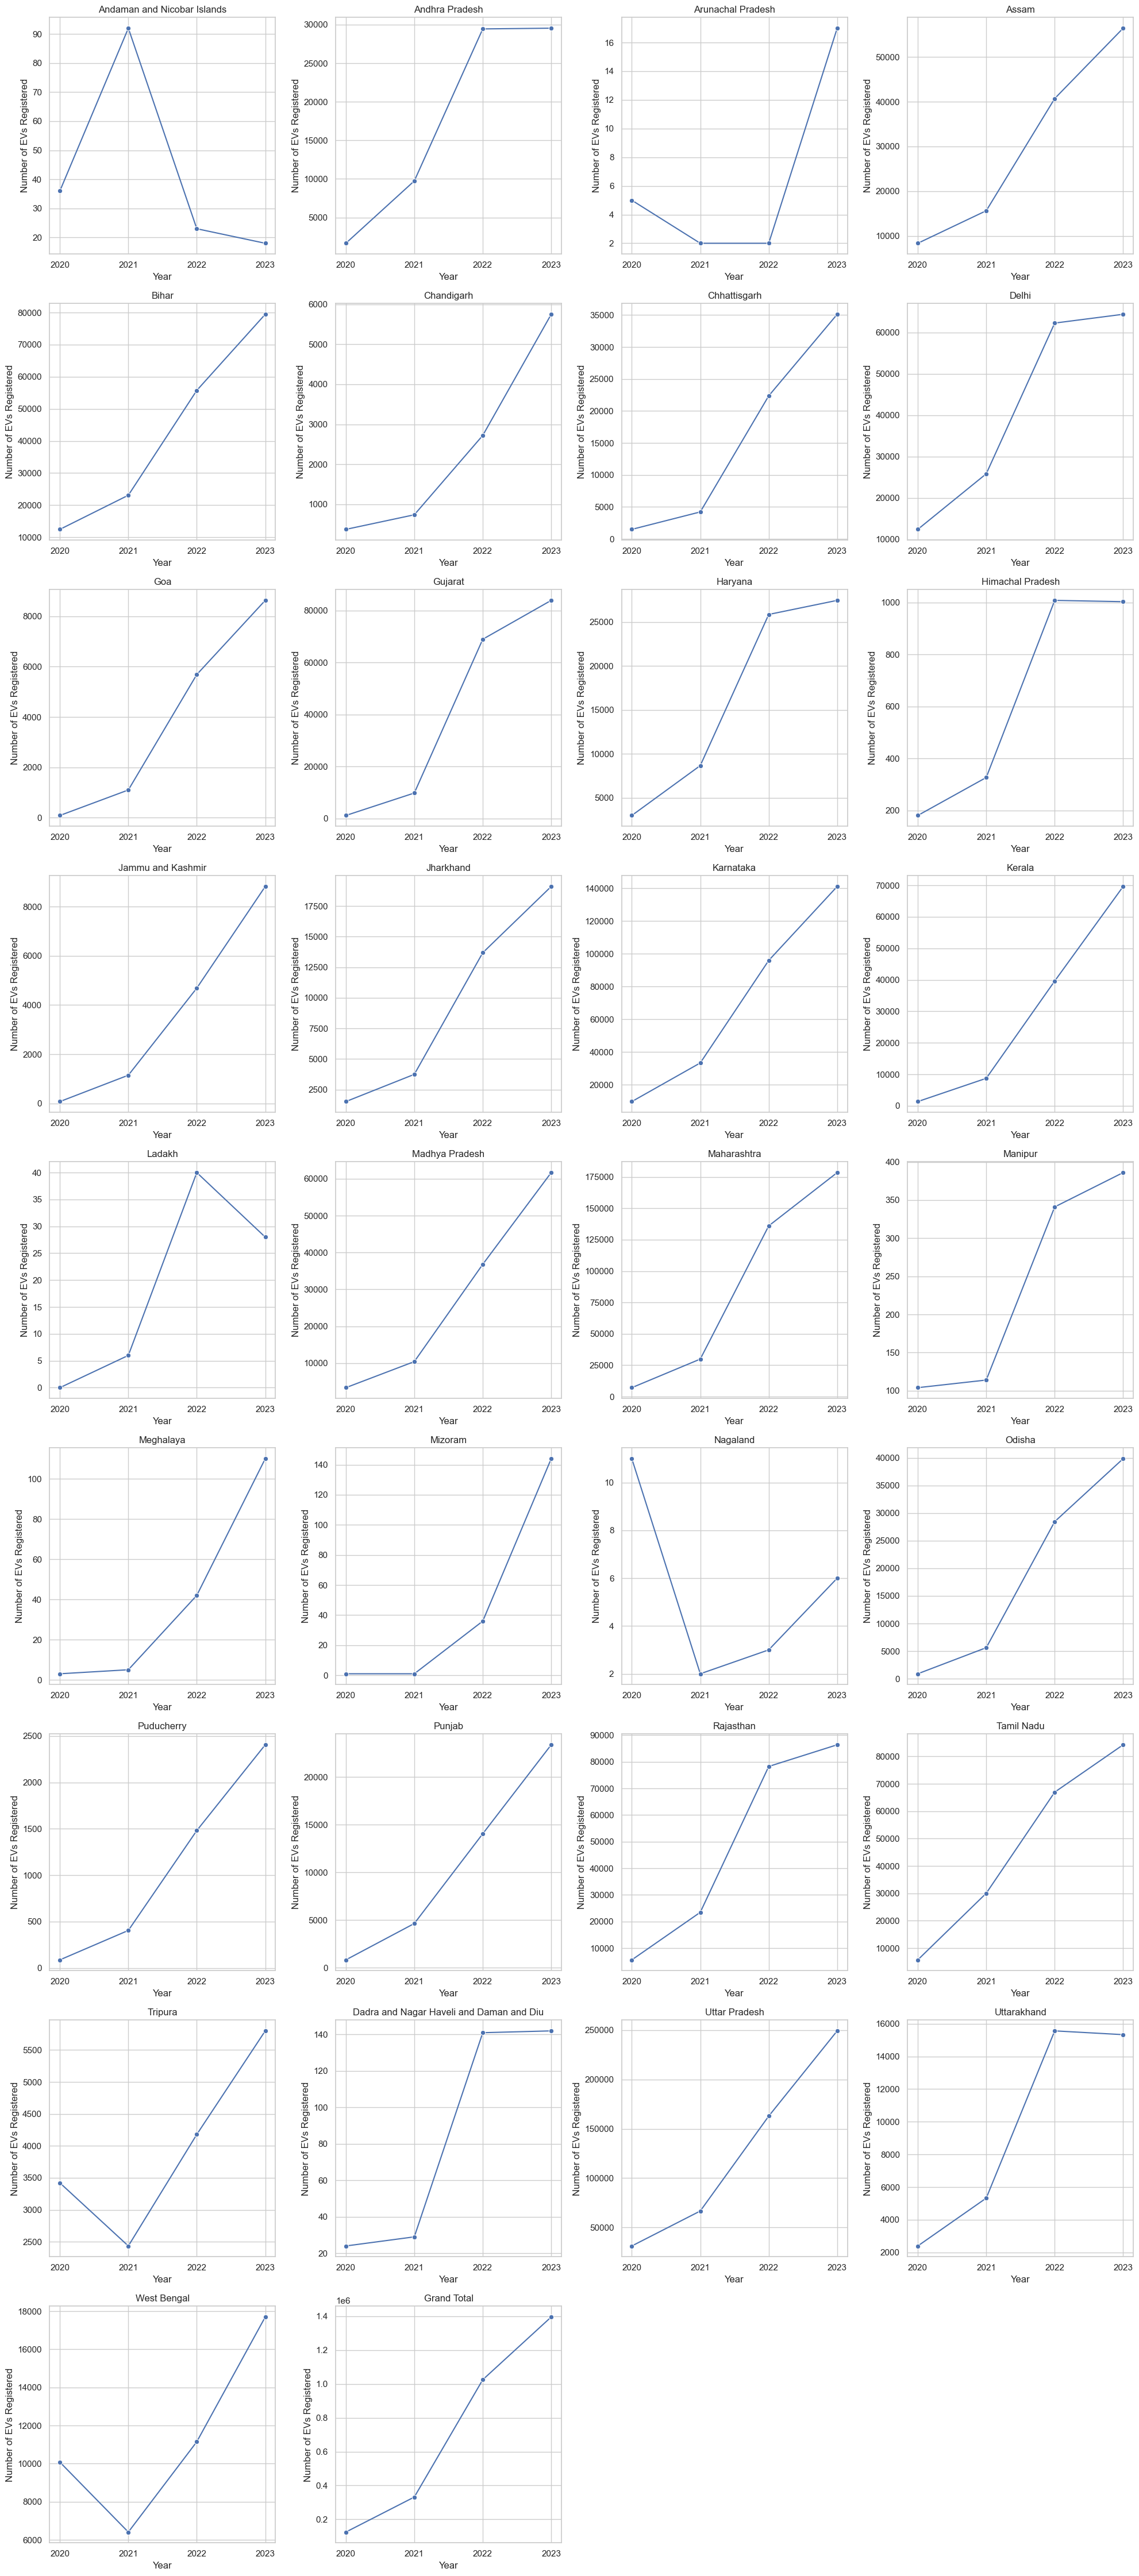

In [468]:
sns.set(style="whitegrid")

num_states = df5.shape[0]
num_cols = 4
num_rows = 9
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  

# Loop through each state and create a line plot in the corresponding subplot
i=0
for i, ax in enumerate(axes):
    if i < num_states:
        state_data = df5.iloc[i]
        years = ['2020', '2021', '2022', '2023']
        ev_counts = state_data[years].values

        # Create the line plot for the state
        sns.lineplot(x=years, y=ev_counts, ax=ax, marker='o')
        ax.set_title(state_data['State/UT'])
        ax.set_xlabel('Year')
        ax.set_ylabel('Number of EVs Registered')
    else:
        ax.axis('off') 

plt.tight_layout()
plt.show()

Category-wise Details of Electric Vehicles Sold as per the e-vahan Portal in the Country from 2018 to 2023

In [196]:
df6 = pd.read_csv(r'Category-wise Details of Electric Vehicles Sold as per the e-vahan Portal in the Country from 2018 to 2023RS_Session_260_AU_1872_A_and_B.csv')
df6.head()

,Sl. No.,Vehicle Category,2018 - Total,2018 - EV,2018 - %,2019 - Total,2019 - EV,2019 - %,2020 - Total,2020 - EV,2020 - %,2021 - Total,2021 - EV,2021 - %,2022 - Total,2022 - EV,2022 - %,2023 (Till 01-08-2023) - Total,2023 (Till 01-08-2023) - EV,2023 (Till 01-08-2023) - %
0,1,Two Wheeler,19576235,17067,0.09,18644700,30389,0.16,14305129,29113,0.20,13926217,156243,1.12,15592118,631181,4.05,9276337,489637,5.28
1,2,Three Wheeler,764806,110133,14.40,765867,133489,17.43,400893,90385,22.55,390820,158129,40.46,677034,350247,51.73,572654,300114,52.41
2,3,Four Wheeler,2999288,1047,0.03,2822782,962,0.03,2396428,3207,0.13,2945340,12259,0.42,3346973,33205,0.99,2020459,40186,1.99
3,4,Goods Vehicles,886047,658,0.07,799661,54,0.01,503358,15,0.00,602805,1118,0.19,804409,653,0.08,490920,1512,0.31
4,5,Public Service Vehicle,79317,50,0.06,81022,508,0.63,40328,88,0.22,15434,1177,7.63,45448,1972,4.34,47058,985,2.09


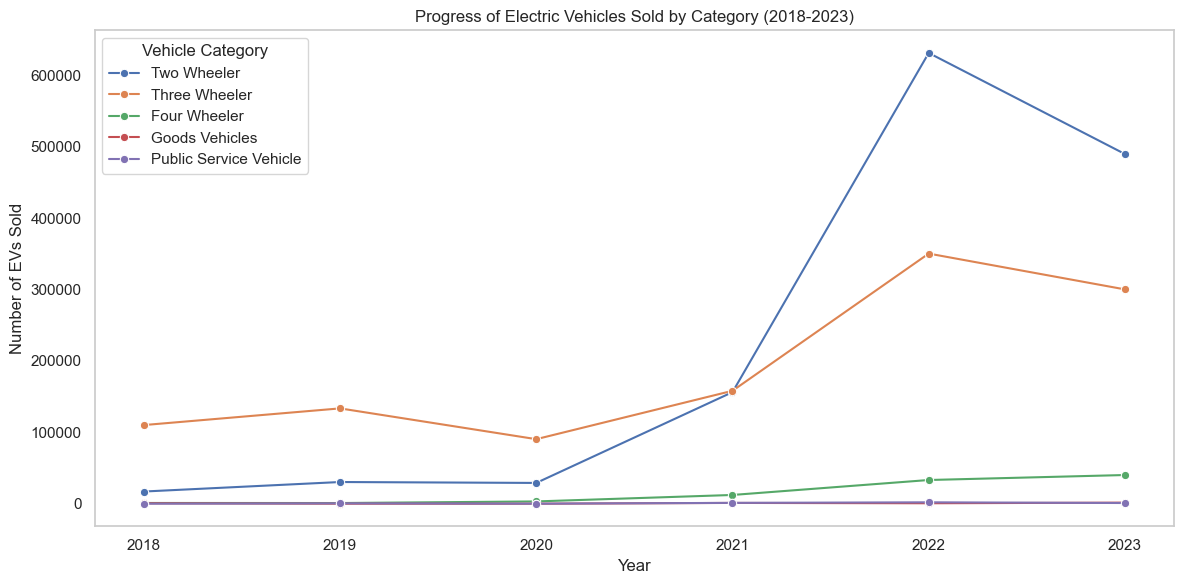

In [462]:
# Melt the DataFrame to long format for better visualization
df_melted = df6.melt(id_vars=['Vehicle Category'],
                     value_vars=['2018 - EV', '2019 - EV', '2020 - EV', '2021 - EV', '2022 - EV', '2023 (Till 01-08-2023) - EV'],
                     var_name='Year', value_name='EV Sold')

df_melted['Year'] = df_melted['Year'].str.extract(r'(\d{4})').astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='EV Sold', hue='Vehicle Category', marker='o')

plt.title('Progress of Electric Vehicles Sold by Category (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of EVs Sold')
plt.xticks(df_melted['Year'].unique())  # Ensure all years are shown
plt.legend(title='Vehicle Category')
plt.grid()
plt.tight_layout()
plt.show()

StateUT-wise Number of Operational Public Electric Vehicles (EVs) Charging Stations (PCS) as on 31st March 2024

In [400]:
df3 = pd.read_csv(r'StateUT-wise Number of Operational Public Electric Vehicles (EVs) Charging Stations (PCS) as on 31st March 2024RS_Session_265_AU_2151_E.csv')
df3.head()

,Sl. No.,State/ UT,No. of PCS as on 31st March 2024
0,1,Andaman and Nicobar Islands,3
1,2,Andhra Pradesh,327
2,3,Arunachal Pradesh,9
3,4,Assam,86
4,5,Bihar,124


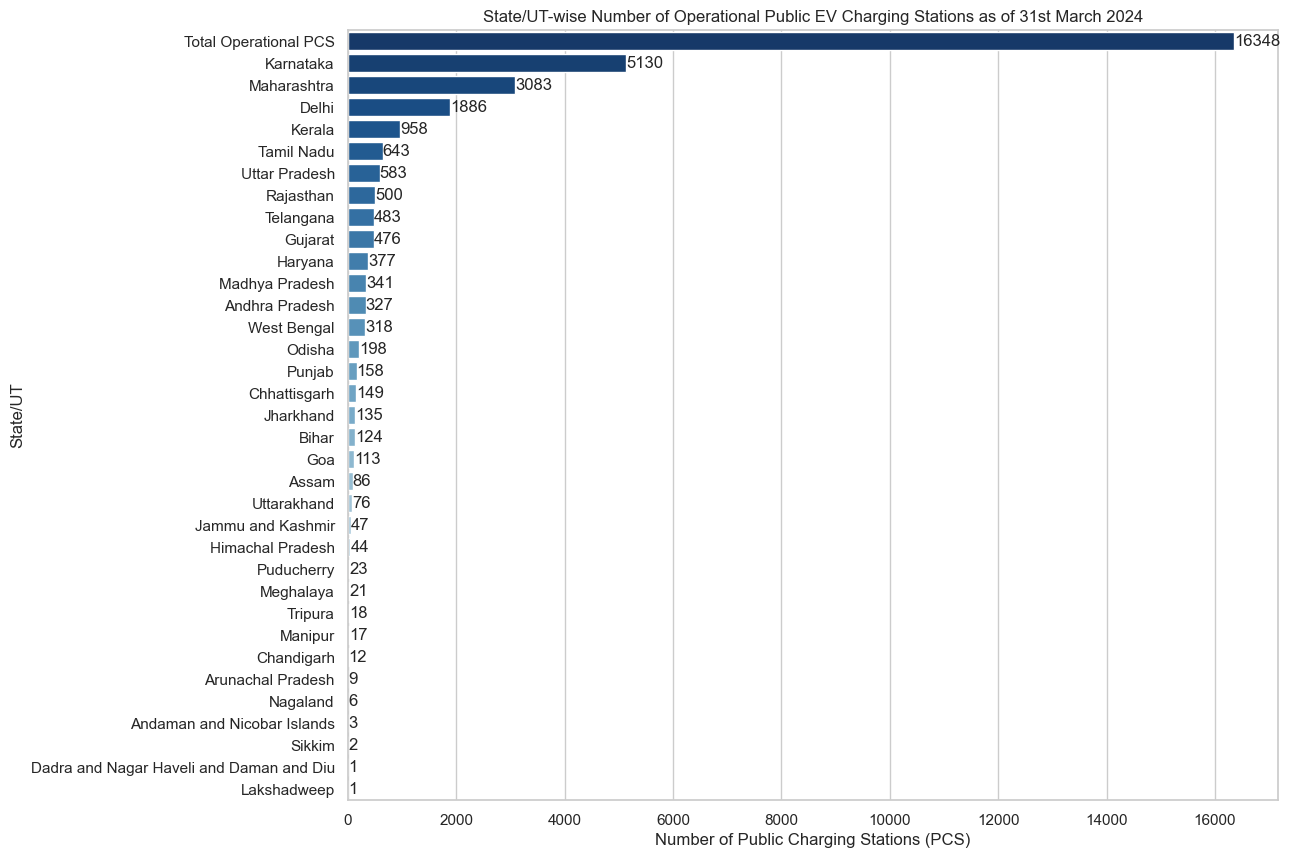

In [548]:
# Ensure that data is sorted by the number of PCS
df3 = df3.sort_values(by="No. of PCS as on 31st March 2024", ascending=False)


plt.figure(figsize=(12, 10))
sns.barplot(
    x="No. of PCS as on 31st March 2024", 
    y="State/ UT",
    hue="State/ UT", 
    data=df3, 
    palette="Blues_r"
)

plt.xlabel("Number of Public Charging Stations (PCS)")
plt.ylabel("State/UT")
plt.title("State/UT-wise Number of Operational Public EV Charging Stations as of 31st March 2024")

for index, value in enumerate(df3["No. of PCS as on 31st March 2024"]):
    plt.text(value, index, str(value), va='center')
plt.show()

In [552]:
df3['State/ UT'].values

array(['Total Operational PCS', 'Karnataka', 'Maharashtra', 'Delhi',
       'Kerala', 'Tamil Nadu', 'Uttar Pradesh', 'Rajasthan', 'Telangana',
       'Gujarat', 'Haryana', 'Madhya Pradesh', 'Andhra Pradesh',
       'West Bengal', 'Odisha', 'Punjab', 'Chhattisgarh', 'Jharkhand',
       'Bihar', 'Goa', 'Assam', 'Uttarakhand', 'Jammu and Kashmir',
       'Himachal Pradesh', 'Puducherry', 'Meghalaya', 'Tripura',
       'Manipur', 'Chandigarh', 'Arunachal Pradesh', 'Nagaland',
       'Andaman and Nicobar Islands', 'Sikkim',
       'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep'],
      dtype=object)

StateUT-wise Details of 5293 Electric Vehicle Charging Stations established along National Highways

In [491]:
df8 = pd.read_csv(r'StateUT-wise Details of 5293 Electric Vehicle Charging Stations established along National Highways (in Reply to Unstarred Question on 24 July, 2024) RS_Session_265_AU_277_A_to_B_i.csv')
df8.head()

,Sl. No.,State/UTs,Number of EV charging Stations on National Highways
0,1,Andaman and Nicobar Islands,1
1,2,Andhra Pradesh,249
2,3,Arunachal Pradesh,30
3,4,Assam,147
4,5,Bihar,96


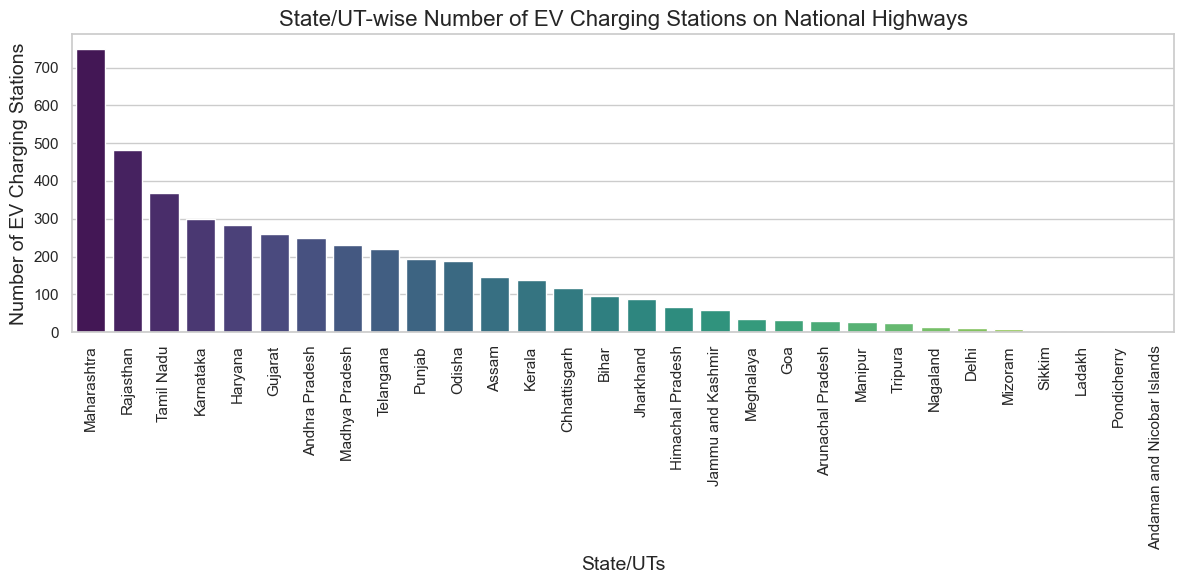

In [480]:
# Remove the last row
df8 = df8.drop(df8.index[-1])

# Order the DataFrame by the number of charging stations in descending order
df8_sorted = df8.sort_values(by="Number of EV charging Stations on National Highways", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df8_sorted,
    x="State/UTs",
    y="Number of EV charging Stations on National Highways",
    palette="viridis",
     hue="State/UTs"
)

# Add title and labels
plt.title("State/UT-wise Number of EV Charging Stations on National Highways", fontsize=16)
plt.xlabel("State/UTs", fontsize=14)
plt.ylabel("Number of EV Charging Stations", fontsize=14)
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [560]:
df8_sorted['State/UTs'].values

array(['Maharashtra', 'Rajasthan', 'Tamil Nadu', 'Karnataka', 'Haryana',
       'Gujarat', 'Andhra Pradesh', 'Madhya Pradesh', 'Telangana',
       'Punjab', 'Odisha', 'Assam', 'Kerala', 'Chhattisgarh', 'Bihar',
       'Jharkhand', 'Himachal Pradesh', 'Jammu and Kashmir', 'Meghalaya',
       'Goa', 'Arunachal Pradesh', 'Manipur', 'Tripura', 'Nagaland',
       'Delhi', 'Mizoram', 'Sikkim', 'Ladakh', 'Pondicherry',
       'Andaman and Nicobar Islands'], dtype=object)

StateUts-wise No. of Retail Outlets (Ros) where Electric Vehicle (EV) Charging Facility as on 01.01.2022 

In [202]:
df9 = pd.read_csv(r'StateUts-wise No. of Retail Outlets (Ros) where Electric Vehicle (EV) Charging Facility as on 01.01.2022 RS_Session_256_AU_2673_3 (1).csv')
df9.head()

,State/UT,No of RO's where EV Charging Facility available
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


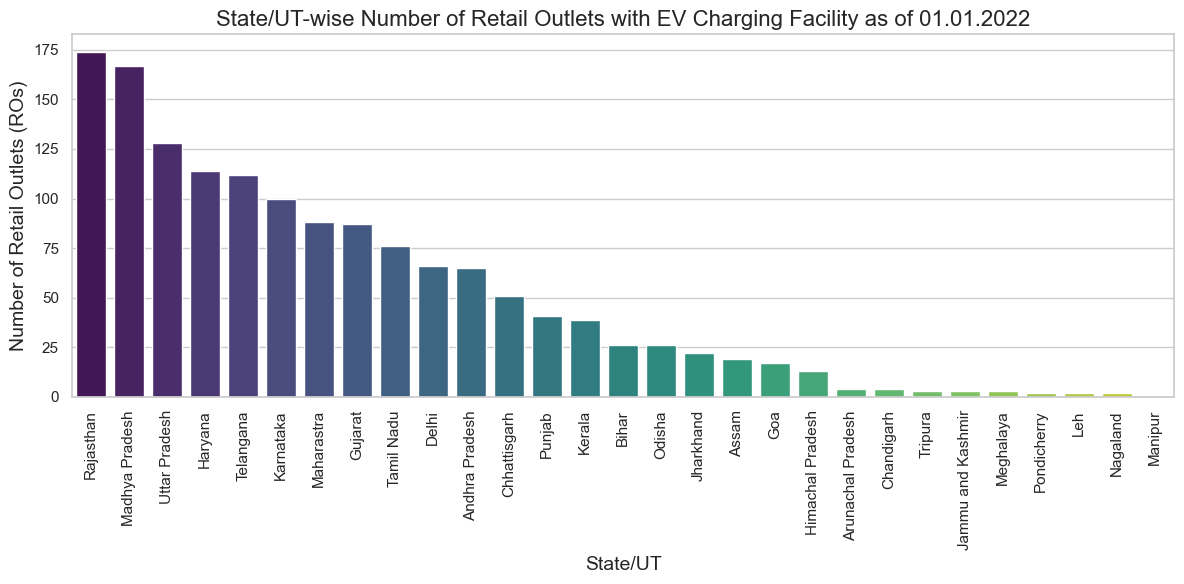

In [489]:
df9 = df9[:-1]

# Group the data by 'State/UT' and sum the number of ROs
df9_grouped = df9.groupby('State/UT', as_index=False)['No of RO\'s where EV Charging Facility available'].sum()

# Order the data in descending order
df9_grouped = df9_grouped.sort_values(by='No of RO\'s where EV Charging Facility available', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='State/UT', 
            y='No of RO\'s where EV Charging Facility available', 
            data=df9_grouped, 
            palette='viridis',
            hue='State/UT')

plt.title('State/UT-wise Number of Retail Outlets with EV Charging Facility as of 01.01.2022', fontsize=16)
plt.xlabel('State/UT', fontsize=14)
plt.ylabel('Number of Retail Outlets (ROs)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [565]:
df9_grouped['State/UT'].values

array(['Rajasthan', 'Madhya Pradesh', 'Uttar Pradesh', 'Haryana',
       'Telangana', 'Karnataka', 'Maharastra', 'Gujarat', 'Tamil Nadu',
       'Delhi', 'Andhra Pradesh', 'Chhattisgarh', 'Punjab', 'Kerala',
       'Bihar', 'Odisha', 'Jharkhand', 'Assam', 'Goa', 'Himachal Pradesh',
       'Arunachal Pradesh', 'Chandigarh', 'Tripura', 'Jammu and Kashmir',
       'Meghalaya', 'Pondicherry', 'Leh', 'Nagaland', 'Manipur'],
      dtype=object)

Year-wise Details of Budgetary Allocation and Expenditure of Funds under Phase-II of Faster Adoption and Manufacturing of (Hybrid) Electric Vehicles (FAME) from 2019-20 to 2023-24

In [208]:
df10 = pd.read_csv(r'Year-wise Details of Budgetary Allocation and Expenditure of Funds under Phase-II of Faster Adoption and Manufacturing of (H.csv')
df10.head()

,Financial Year,Budget Allocation,Fund Utilization as on 31-01-2024
0,2019-20,500.00,500.00
1,2020-21,318.36,318.36
2,2021-22,800.00,800.00
3,2022-23,2897.84,2402.51
4,2023-24,5171.97,1980.83


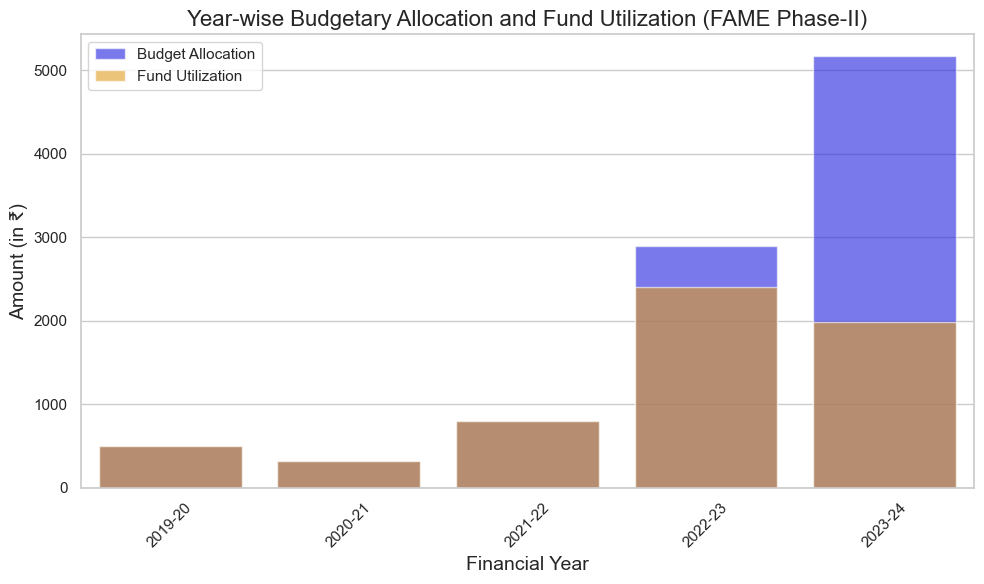

In [497]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df10, x='Financial Year', y='Budget Allocation', color='blue', label='Budget Allocation', alpha=0.6)
sns.barplot(data=df10, x='Financial Year', y='Fund Utilization as on 31-01-2024', color='orange', label='Fund Utilization', alpha=0.6)
plt.title('Year-wise Budgetary Allocation and Fund Utilization (FAME Phase-II)', fontsize=16)
plt.xlabel('Financial Year', fontsize=14)
plt.ylabel('Amount (in ₹)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Category-wise Details of the Targeted Vehicles to be Supported vs Actual Vehicle Sales under Faster Adoption and Manufacturing of Electric Vehicles in India Phase II (FAME India Phase II) 

In [509]:
df11 = pd.read_csv(r'Category-wise Details of the Targeted Vehicles to be Supported vs Actual Vehicle Sales under Faster Adoption and Manufacturi.csv')
df11.head()

,Category,Vehicles to be Supported (in No.),Actual Vehicles Supported (in No.)
0,e-2W,1000000,792529
1,e-3W,500000,81172
2,e-4W,55000,6831
3,e-Buses,7090,2435
4,Total,1562090,882967


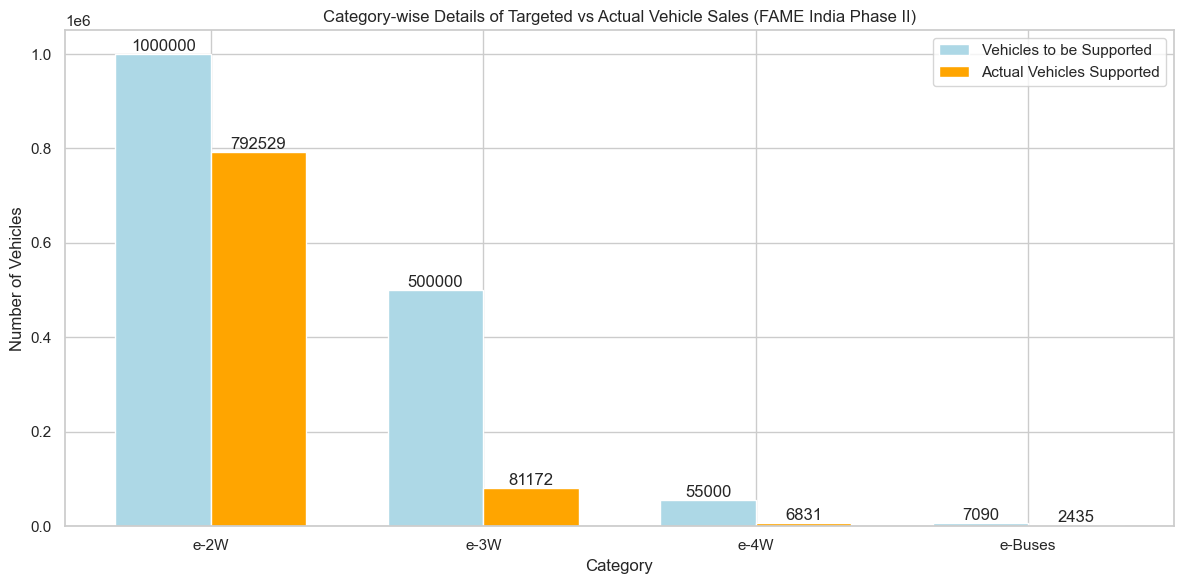

In [517]:
df11 = df11[df11['Category'] != 'Total']
plt.figure(figsize=(12, 6))

bar_width = 0.35
x = range(len(df11['Category']))
bars1 = plt.bar(x, df11['Vehicles to be Supported (in No.)'], width=bar_width, label='Vehicles to be Supported', color='lightblue')
bars2 = plt.bar([p + bar_width for p in x], df11['Actual Vehicles Supported (in No.)'], width=bar_width, label='Actual Vehicles Supported', color='orange')
plt.xlabel('Category')
plt.ylabel('Number of Vehicles')
plt.title('Category-wise Details of Targeted vs Actual Vehicle Sales (FAME India Phase II)')
plt.xticks([p + bar_width / 2 for p in x], df11['Category'])
plt.legend()
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Market Segmentation using K Means Clustering

#### Clustering based on 2WN and 3WT vehicle categories

In [591]:
df2.head()

,S No,State,2WIC,2WN,2WT,3WIC,3WN,3WT,4WIC,HGV,...,HPV,LGV,LMV,LPV,MGV,MMV,MPV,OTH,Total,Cluster
0,1,ANDAMAN & NICOBAR ISLAND,0,29,40,0,0,30,0,0,...,40,2,101,17,0,0,0,0,259,0
1,2,ANDHRA PRADESH,2,109754,602,0,743,6213,3,23,...,128,85,6302,58,0,5,1,1870,125797,2
2,3,ARUNACHAL PRADESH,0,29,0,0,0,3,0,0,...,0,0,52,1,0,0,0,0,85,0
3,4,ASSAM,0,8803,0,0,1,194541,0,4,...,115,526,747,72,0,0,118,1,204928,0
4,5,BIHAR,0,44792,0,0,2,252637,2,7,...,27,237,1614,21,1,0,0,0,299340,0


In [21]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

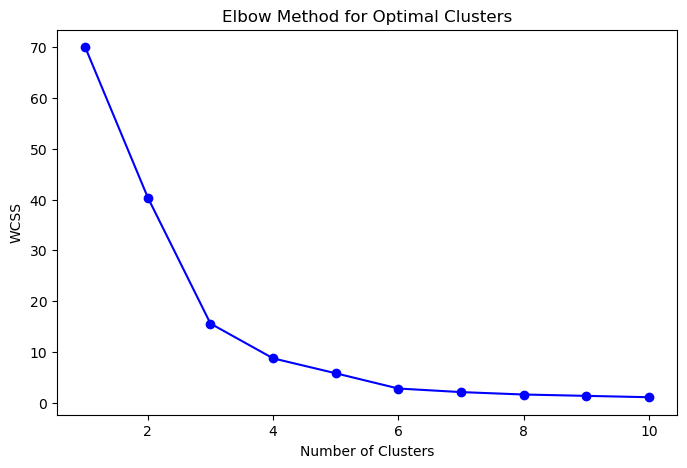

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select only relevant columns for 2WN and 3WT
data = df2[['2WN', '3WT']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 1: Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # Try 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


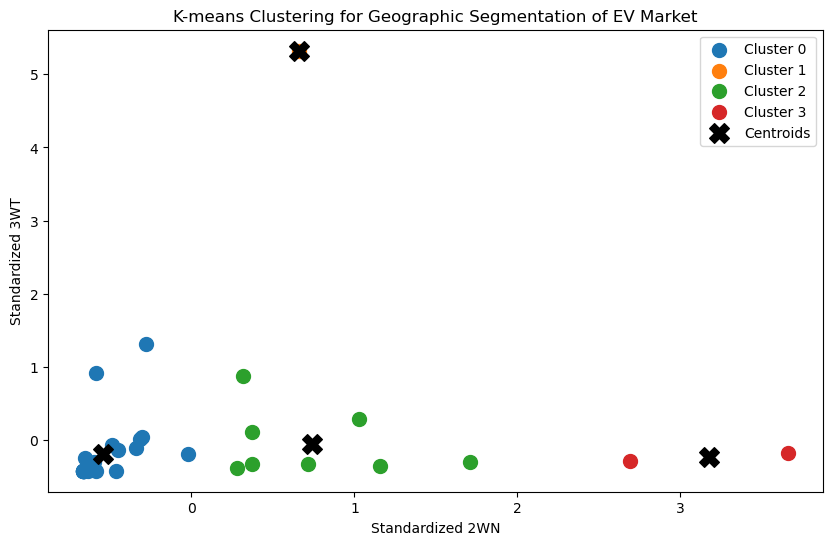

                       State     2WN     3WT  Cluster
0   ANDAMAN & NICOBAR ISLAND      29      30        0
1             ANDHRA PRADESH  109754    6213        2
2          ARUNACHAL PRADESH      29       3        0
3                      ASSAM    8803  194541        0
4                      BIHAR   44792  252637        0
5                 CHANDIGARH    4720    8684        0
6               CHHATTISGARH   74852   33550        0
7                      DELHI  113861  189702        2
8                        GOA   23594     141        0
9                    GUJARAT  212011    9484        2
10                   HARYANA   41906   68068        0
11          HIMACHAL PRADESH    3213     336        0
12         JAMMU AND KASHMIR    7942   18183        0
13                 JHARKHAND   24920   41025        0
14                 KARNATAKA  390810   19195        3
15                    KERALA  160416   12593        2
16                    LADAKH      62       1        0
17               LAKSHADWEEP

In [45]:
# Step 2: Choosing the optimal number of clusters based on the elbow (e.g., 3)
optimal_clusters = 4  # Adjust based on the elbow plot

# Step 3: Applying K-means to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df2['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(data_scaled[df2['Cluster'] == i, 0], data_scaled[df2['Cluster'] == i, 1], 
                s=100, label=f'Cluster {i}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='X', label='Centroids')
plt.title('K-means Clustering for Geographic Segmentation of EV Market')
plt.xlabel('Standardized 2WN')
plt.ylabel('Standardized 3WT')
plt.legend()
plt.show()

# Step 4: Analyzing the clusters
# Display the first few rows with cluster assignments
print(df2[['State', '2WN', '3WT', 'Cluster']])


#### Clustering based on LMV and MPV vehicle categories

C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

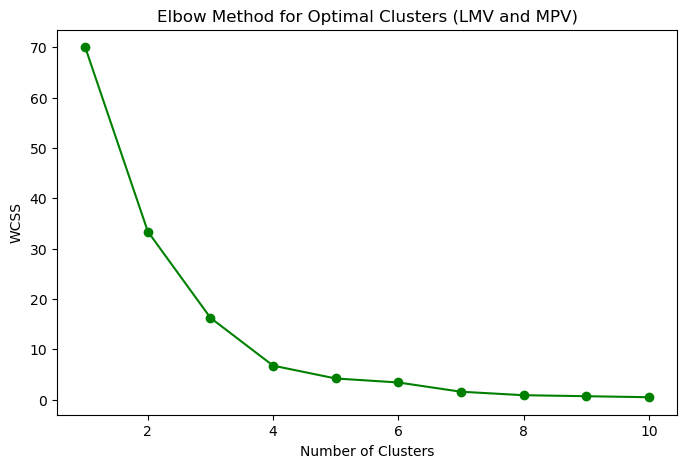

In [73]:

data_lmv_mpv = df2[['LMV', 'MPV']]

# Standardize the data
scaler_lmv_mpv = StandardScaler()
data_lmv_mpv_scaled = scaler_lmv_mpv.fit_transform(data_lmv_mpv)

# Step 1: Using the Elbow Method to find the optimal number of clusters
wcss_lmv_mpv = []
for i in range(1, 11):  # Try 1 to 10 clusters
    kmeans_lmv_mpv = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_lmv_mpv.fit(data_lmv_mpv_scaled)
    wcss_lmv_mpv.append(kmeans_lmv_mpv.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_lmv_mpv, marker='o', linestyle='-', color='g')
plt.title('Elbow Method for Optimal Clusters (LMV and MPV)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\febio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


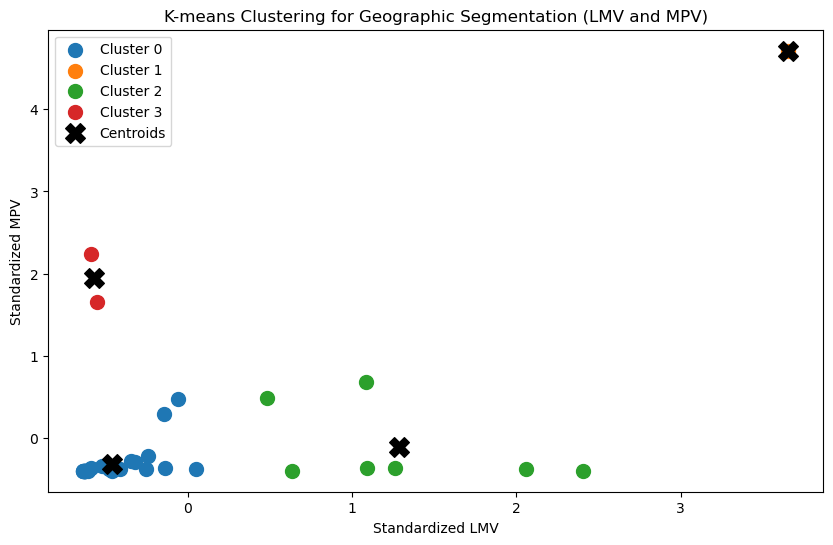

                       State    LMV  MPV  Cluster_LMV_MPV
0   ANDAMAN & NICOBAR ISLAND    101    0                0
1             ANDHRA PRADESH   6302    1                0
2          ARUNACHAL PRADESH     52    0                0
3                      ASSAM    747  118                3
4                      BIHAR   1614    0                0
5                 CHANDIGARH   2651    7                0
6               CHHATTISGARH   3486    1                0
7                      DELHI  15884    2                2
8                        GOA   2878    6                0
9                    GUJARAT  15834   62                2
10                   HARYANA   4566    2                0
11          HIMACHAL PRADESH    428    2                0
12         JAMMU AND KASHMIR    409  152                3
13                 JHARKHAND   1026    3                0
14                 KARNATAKA  27937    0                2
15                    KERALA  24770    1                2
16            

In [71]:
# Step 2: Choosing the optimal number of clusters based on the elbow (e.g., 4)
optimal_clusters_lmv_mpv = 4  # Adjust based on the elbow plot

# Step 3: Applying K-means to the dataset with the optimal number of clusters
kmeans_lmv_mpv = KMeans(n_clusters=optimal_clusters_lmv_mpv, init='k-means++', random_state=42)
df2['Cluster_LMV_MPV'] = kmeans_lmv_mpv.fit_predict(data_lmv_mpv_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters_lmv_mpv):
    plt.scatter(data_lmv_mpv_scaled[df2['Cluster_LMV_MPV'] == i, 0], 
                data_lmv_mpv_scaled[df2['Cluster_LMV_MPV'] == i, 1], 
                s=100, label=f'Cluster {i}')

# Plotting the centroids
centroids_lmv_mpv = kmeans_lmv_mpv.cluster_centers_
plt.scatter(centroids_lmv_mpv[:, 0], centroids_lmv_mpv[:, 1], 
            s=200, color='k', marker='X', label='Centroids')
plt.title('K-means Clustering for Geographic Segmentation (LMV and MPV)')
plt.xlabel('Standardized LMV')
plt.ylabel('Standardized MPV')
plt.legend()
plt.show()

print(df2[['State', 'LMV', 'MPV', 'Cluster_LMV_MPV']])